Colab link: https://colab.research.google.com/drive/1_hez3-MNIZYuH9XGzvanP8E0oTj6_9K6?usp=sharing.

# CIFAR-10 dataset

In this notebook, we use the CIFAR-10 dataset made of images from 10 classes: plane, car, bird, cat, deer, dog, frog, horse, ship, and truck. The images are all of the same size with $3\times 32\times 32$ pixels. The first channel is used for the RGB description of the image with the 2 others are the X and Y position of a pixel.

1. What is the machine learning family this problem is about? What is the nature of the input data?

2. Enumerate some methods that could be used for such a task.

# Prerequisites

3. Import the necessary packages. In particular, we will use:
> * [`matplotlib`](https://matplotlib.org/) for data visualisation and plots,
> * [`numpy`](https://numpy.org/) for standard numerical operations and algebra,
> * [`pyTorch`](https://pytorch.org/) for deep learning models and related functions used for model selection or data pre-processing.

In [1]:
import matplotlib.pyplot as plt     # For plotting
import matplotlib as mpl            # For plotting setup
import numpy as np                  # For numerical calculations

from sklearn.model_selection import train_test_split

# All the torch-related libraries
import torch                  # Generic torch path
import torchvision            # Contains some datasets and utilities functions
from torch import nn          # To build neural networks
import torch.optim as optim   # Optimization functions
import torchvision.transforms as transforms   # For the PIL to tensor format
from torch.utils.data.sampler import SubsetRandomSampler # For validation set

# Formatting the plots
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'normal'
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.formatter.limits'] = (-6, 6)
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Function to print the accuracy of our model on the different classes
def print_acc(model, testloader, classes):
  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  # again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = model(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1


  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Download the data
transform = transforms.Compose(
    [transforms.ToTensor(), # PIL image to tensor
     transforms.Normalize((0.4912, 0.4829, 0.4479), (0.2470, 0.2435, 0.2616))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170M/170M [00:02<00:00, 70.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


To access the images, you can use the `trainset.data` command returning the set of all images. For the class, use `trainset.targets` which returns the list containing the class of all the images in the same order as in the data.

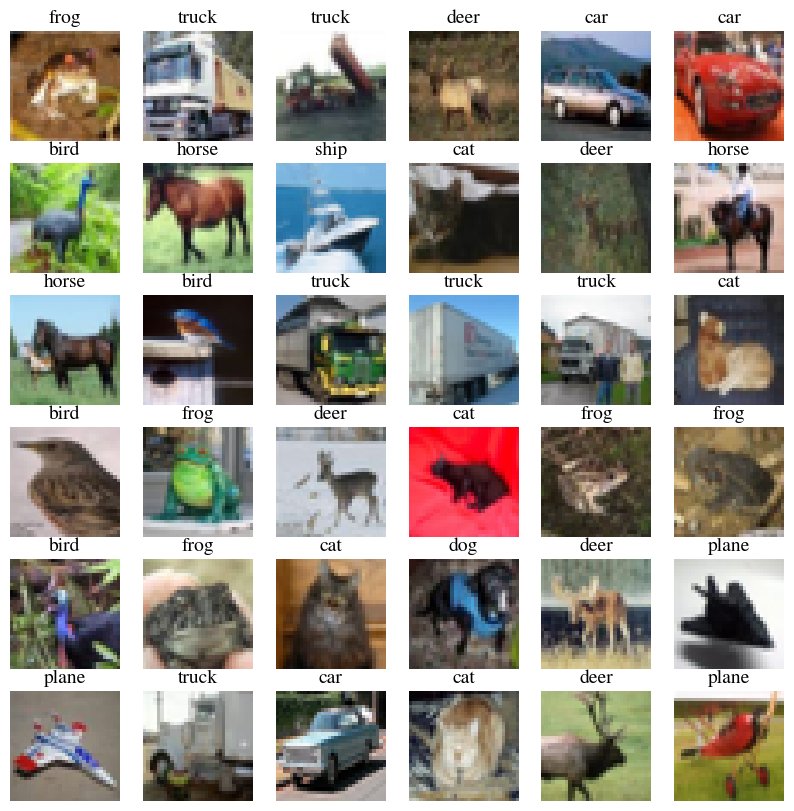

In [2]:
# Plot some images
nx = 6
ny = 6
fig, ax = plt.subplots(nx, ny, figsize=(10,10))
for i in range(nx):
  for j in range(ny):
    ax[i][j].imshow(trainset.data[i*nx+j])
    ax[i][j].axis('off')
    ax[i][j].set_title(classes[trainset.targets[i*nx+j]],
                       fontsize=14)

4. How many images are there in both the train and test datasets?

In [ ]:
# Your code to check the number of images in both sets


5. What are the proportions of images in each class in the two datasets (train and test)
?

In [ ]:
# Your code to check the proportions of images in each class


# Feed-forward neural network

The first model we'll build is a feed-forward neural network. The first step when building a neural network model in PyTorch is to setup the data into an iterable object, called a [DataLoader](https://pytorch.org/docs/stable/data.html). It also allows to shuffle the data based on a given batch size. You can use the [random_split](https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987) function to operate the validation split.

6. Remind:
  1) what are the use of train/validation/test sets,
  2) what is a batch size and what is it used for in optimization.

In [ ]:
BATCH_SIZE = 64         # Size of the batches
SIZE_IN = (3, 32, 32)   # Size of one input image
SIZE_OUT = 10           # Number of classes

# Your code to split the data into train/validation


# Prepare the dataloaders

In PyTorch, a model can be specified as a sequence of several layers. All the possible layers proposed by PyTorch are listed [here](https://pytorch.org/docs/stable/nn.html#linear-layers).

To implement a new model, one needs to create a subclass of `torch.nn.Module` and specify in a first function `__init__(self):` the layers with their input and output sizes. Those layers will be used in a second function `forward(self, x)` taking as argument the model and a data $x$ (here an image for us).

7. Specify a network with 3 hidden layers. The first layer has 300 neurons, the second has 100 neurons, and the last has 50 neurons. They all have ReLU activation. The final layer will be of size 10 (number of classes) with no activation function. To help you, you can draw the diagram of this neural network.

To help you, you can also have a look at [this link](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

In [ ]:
# @title
class FCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Your code for the different layers

    def forward(self, x):
        # First flatten the data
        out = x.view(x.size(0), -1)
        # Your code to propagate the information forward

        return out

neural_net = FCNN() # Create an instance of an FCNN

8. How many parameters does this network have (numerically and analytically)?

In [ ]:
# Your code to compute the number of parameters

Now our model is fully specified, we have all the parameters.
To train our neural network with the data at hand, we use the backpropagation algorithm and the stochastic gradient descent method.

9. Remind how stochastic gradient descent works.

10. Specify a loss function and an optimization procedure. In our case, we'll use the [cross-entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) together with the [SGD optimizer](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). Set the learning rate to 0.02.

In [ ]:
# Your code to define the loss and optimizer

11. Train the neural network for 10 epochs.
To compute and update the gradient, there are four steps:
> * First compute the loss on the batch,
> * Clean your optimizer using the [`optimizer.zero_grad()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html) function,
> * Call the [`backward()`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) function of the loss to compute the gradient,
> * Make a step in the opposite gradient direction using the [`optimizer.step()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html) function.

Make sure to save the train and validation loss functions to vizualize it afterwards.

In [ ]:
N_EPOCHS = 10

# Loop for a fixed number of epochs
for epoch in range(N_EPOCHS):

    # Code for the training part
    neural_net.train()                    # Set my model in training model
    total_loss = 0
    for (X_batch, y_batch) in trainloader:
      # Your turn!
      # Prediction of my model on the batch of data
      # Compute the loss on the batch
      # Set the gradient to zero before backprop
      # Perform backpropagation
      # Take one step in the opposite gradient direction
      total_loss += loss.item() / n_batches
    train_loss.append(total_loss)

    # Code for the evaluation part after one batch
    neural_net.eval()                     # Set my model in evaluation mode
    # Your turn!


12. Have a look at the evolution of the validation and training losses over the epochs. Do you see any sign of over or under fitting?

In [ ]:
# Your code to plot the training and validation losses

In [ ]:
# To compute the accuracy of your model on each class
print_acc(neural_net, validloader, classes)

# Convolutional neural network

Let us now build another model that is acknowledged to be better suited for the handling of images by incorporating some (local) invariances to translation and deformations: the Convolutional Neural Network.

13. Remind the key building blocks of a CNN and what they do mathematically.

The model we will build is based on the original application of the CNN proposed by [Lecun+98](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) (see Fig. 2).
Our network is made of:
- One convolutional layer with 6 filters of size 5x5 and a padding of 2 and ReLU activation,
- One average pooling with kernel size 2,
- One convolutional layer with 16 filters of size 5x5 and ReLU activation,
- One average pooling with kernel size 2,
- One convolutional layer with 120 filters of size 5x5 and ReLU activation,
- A fully-connected layer with 84 neurons and a ReLU activation,
- A fully-connected layer with 10 neurons to predict the class (with no activation).

14. Implement this network using the layers from the [torch.nn](https://pytorch.org/docs/stable/nn.html) module as above.

In [ ]:
# @title
class LeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Your code for the layers

    def forward(self, x):
        # Your code to propagate the information forward
        return out

CNN = LeNet5()
print(CNN)

15. How many parameters this network has? (At least numerically). Comment.

In [ ]:
# Your code to compute the number of parameters in the network

Let's train it and see how it performs!

16. Train the CNN using the cross entropy loss and SGD optimizer as before.

In [ ]:
# Your code to train the CNN

In [ ]:
# In the end, you can compare the two models on the test set
print('FCNN accuracy:')
print_acc(neural_net, testloader, classes)
print('')
print('CNN accuracy:')
print_acc(CNN, testloader, classes)

# Going further

Now you can use the validation set (NOT the test set) to finetune the hyperparameters and see how far you can go. According [this benchmark](https://paperswithcode.com/sota/image-classification-on-cifar-10), the current models dominating the leaderboard on vision data are vision transformers (ViT), [introduced here](https://arxiv.org/pdf/2010.11929.pdf). You could also try to implement this, but you also see that some CNNs are achieving more than 80% accuracy, which is already really good. Some tricks to perform better consist in adding dropout, momentum, learning rate scheduling, in addition to careful hyperparameter tuning.